In [16]:
import pandas as pd
filename = "TeamDifferential.xlsx"
data = pd.read_excel(filename, header=1)
data

,TEAM,PTS,PCT,BPI,OFF,DEF
0,Atlanta Hawks,-0.3,0.508,2.2,4.6,-2.4
1,Boston Celtics,6.1,0.712,8.5,6.6,1.9
2,Brooklyn Nets,1.7,0.517,3.2,2.1,1.2
3,Charlotte Hornets,-6.4,0.283,-3.7,1.3,-5.1
4,Chicago Bulls,-0.2,0.458,0.0,1.1,-1.0
5,Cleveland Cavaliers,5.6,0.695,7.0,5.1,1.9
6,Dallas Mavericks,0.4,0.542,3.9,8.5,-4.6
7,Denver Nuggets,4.3,0.623,6.1,6.8,-0.7
8,Detroit Pistons,-7.5,0.254,-6.8,-0.8,-6.0
9,Golden State Warriors,0.0,0.492,1.7,3.5,-1.8


In [26]:
import matplotlib.pyplot as plt
import numpy as np

corr_data = data.corr().round(2)
corr_data

,PTS,PCT,BPI,OFF,DEF
PTS,1.00,0.90,0.90,0.73,0.71
PCT,0.90,1.00,0.99,0.77,0.82
BPI,0.90,0.99,1.00,0.79,0.81
OFF,0.73,0.77,0.79,1.00,0.29
DEF,0.71,0.82,0.81,0.29,1.00


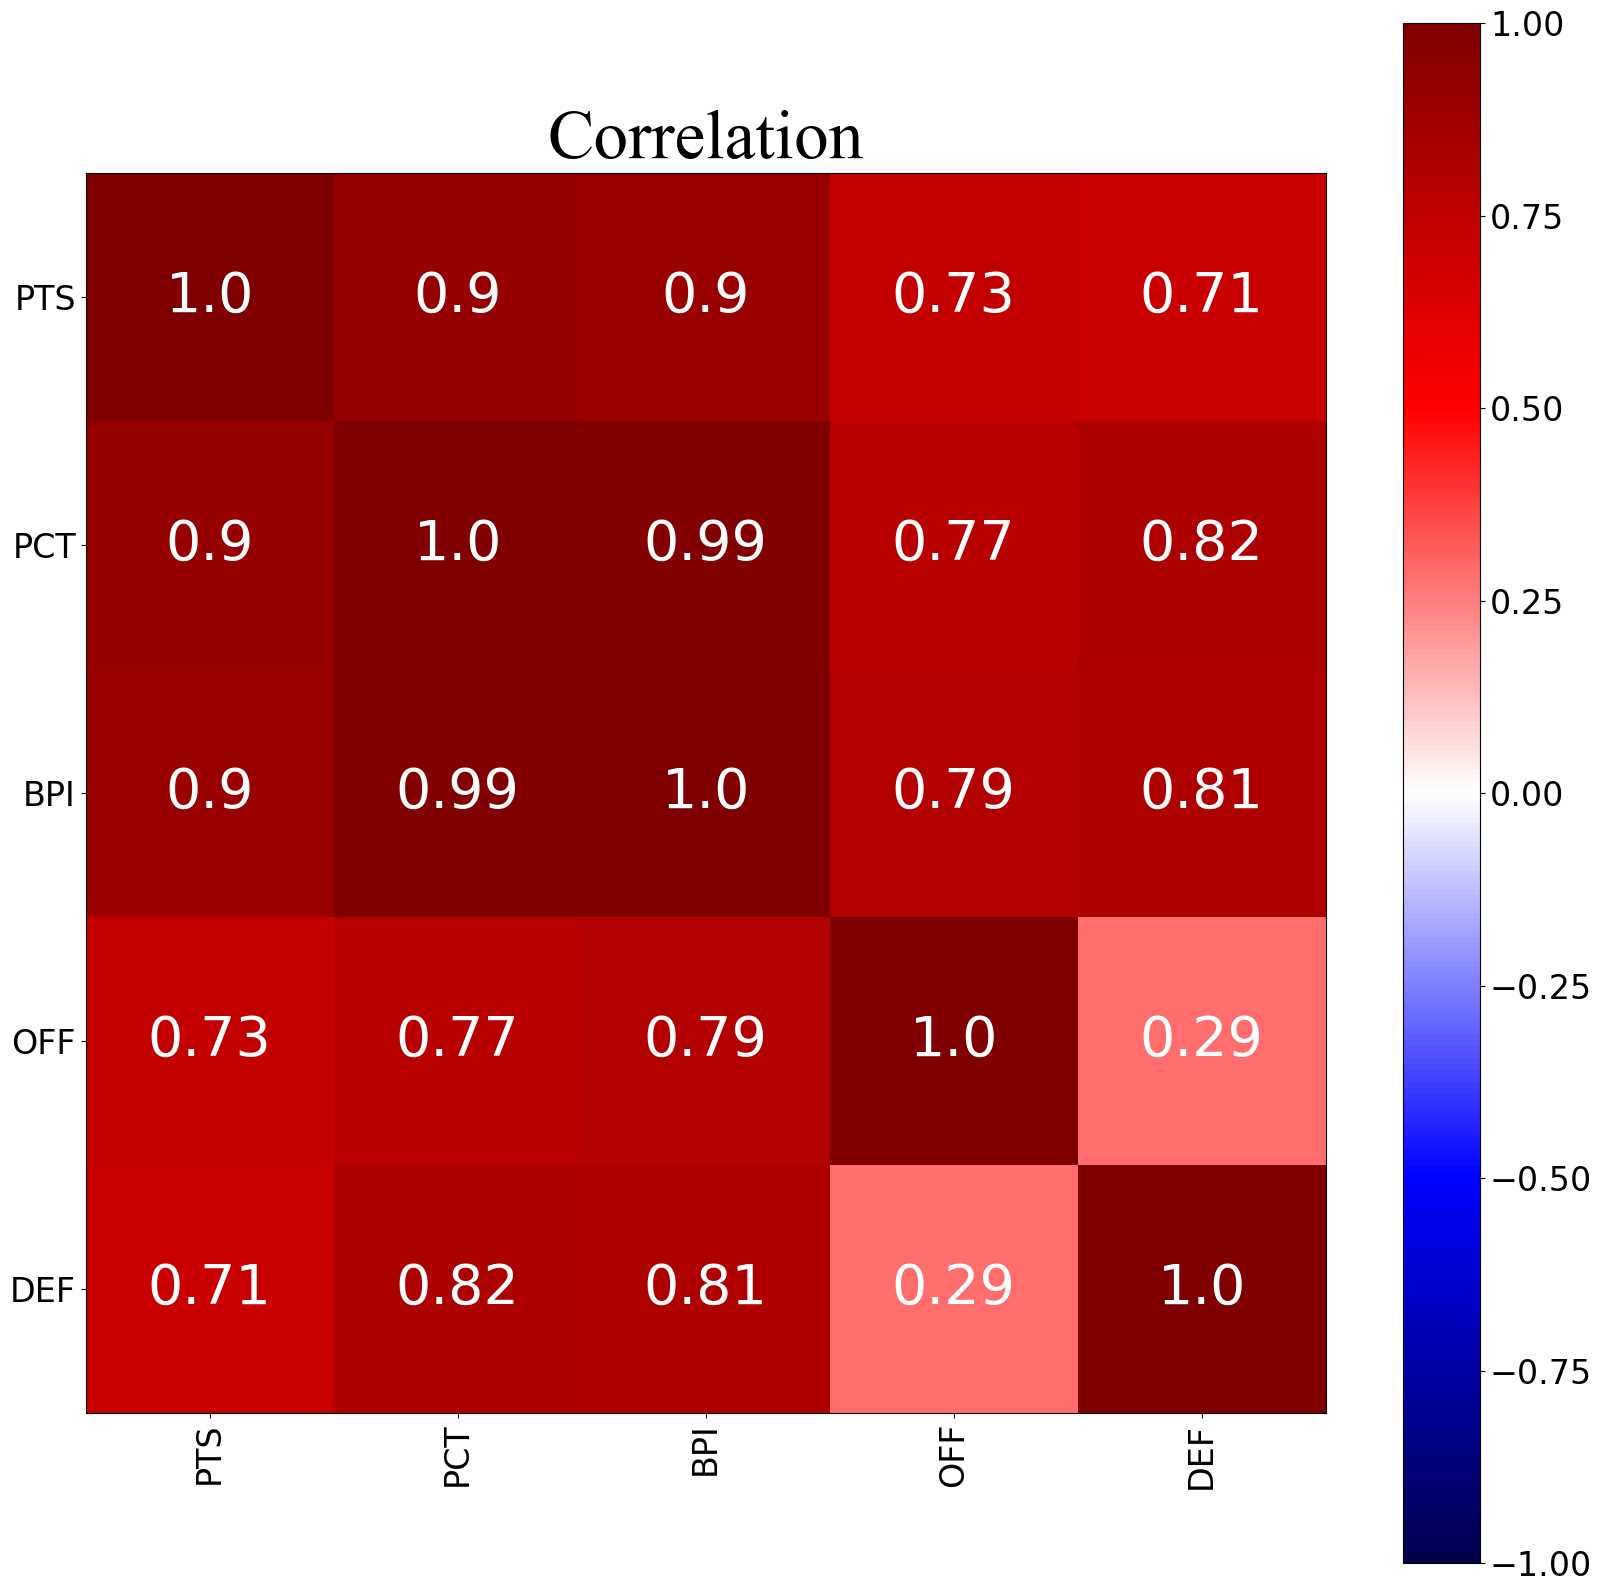

In [27]:
def corr_matrix_heatmap(data, dim = 20, pp = None):
    fig, ax = plt.subplots(figsize = (dim,dim))
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ","\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()


corr_data = data.corr()
corr_matrix_heatmap(data.corr())